<center><h1>A Lower Bound on the Dark Matter Mass from BBN</h1></center>

We want to extract a lower bound on the dark matter mass in various scenarios by running a $\chi^2$ analysis on the computed element abundances using *PrimiCosmo* and *PrimiNuc*.

<center><h3>Statistical Assessment</h3></center>

In order to set constraints ont he dark matter mass, we follow the PDG recommended primordial abundances for Helium and Deuterium, that at 1$\sigma$ read,

$$Y_p = 0.245 \pm 0.003, \quad \mathrm{D}/\mathrm{H} = (2.569 \pm 0.027) \times 10^{-5}$$

In addition, we account for theoretical uncertainties in their predicted abundances resulting from uncertainties in the neutron lifetime and mainly from the ${}^2{\rm H} + p \leftrightarrow n +{}^3{\rm He}$ reaction which explicitly read:
\begin{align}
\sigma(Y_{\rm P})^{\rm Theo} 	        		&= 0.00017 \\
\sigma({\rm D/H}|_{\rm P} )^{\rm Theo}   	&= 0.036 \times 10^{-5}
\end{align}
With this we can write down the effective BBN $\chi^2$ as 
\begin{align}
\chi_{\rm BBN}^2 = \frac{\left[Y_{\rm P} - Y_{\rm P}^{\rm Exp}\right]^2}{\sigma_{Y_{\rm P}}^2|{}^{\rm Theo} + \sigma_{Y_{\rm P}}^2|{}^{\rm Exp}} + \frac{\left[{\rm D/H}|_{\rm P} - {\rm D/H}|_{\rm P}^{\rm Exp}\right]^2}{\sigma_{{\rm D/H}|_{\rm P}}^2|{}^{\rm Theo} + \sigma_{{\rm D/H}|_{\rm P}}^2|{}^{\rm Exp}}
\end{align}
Similarly, we use the latest CMB observations by the Planck satellite to construct a CMB likelihood from their 2018 TT+TE+EE+lowE analysis, that reads:
\begin{align}
\chi_{\rm CMB}^2  = \left(\Theta - \Theta_{\rm obs}\right)^T \,  \Sigma_{\rm CMB}^{-1} \,\left(\Theta - \Theta_{\rm obs}\right)
\end{align}
where $\Theta = (\omega_b h^2,\,N_{\rm eff},\,Y_{\rm P})$, and
\begin{align}
\Sigma_{\rm CMB} = \Delta^T \, \left(
\begin{array}{ccc}
1 & \rho_{12} & \rho_{13}  \\
 \rho_{12}  & 1 &\rho_{23} \\
 \rho_{13}  & \rho_{23} &1 \\
\end{array}
\right) \, \Delta
\end{align}
and:
\begin{align}
\Theta_{\rm obs} &= (0.00223,\, 2.89,\, 0.246) \\
\Delta &= (0.00022,\, 0.31,\, 0.018) \\
\rho_{12},\,\rho_{13},\,\rho_{23} &= 0.40,\, 0.18,\, -0.69
\end{align}

<center><h3>BBN Constraints</h3></center>

We begin with the constraints from Big Bang Nucleosynthesis i.e. by computing $\chi^2_{\mathrm{BBN}}$. We take the **neutrinophilic complex scalar** as the test example. First we load the data and perform a little bit of investigation regarding the distributions and dependence on the dark matter mass.

In [1]:
from utils import get_data
from utils import plot_distributions, plot_abundances, plot_chisq_distribution, plot_mchi_omegab_contours 
from utils import plot_joint_mchi_omegab, plot_deltachisq
from utils import get_chisq_grid, get_mass_omegab_grid, get_masses
from utils import chisq
from utils import save_results

import warnings
warnings.filterwarnings('ignore')

Loaded data from: Nu_Zp.txt
Length: 1440


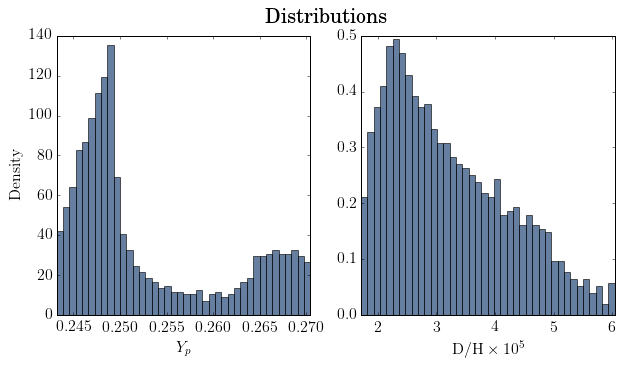

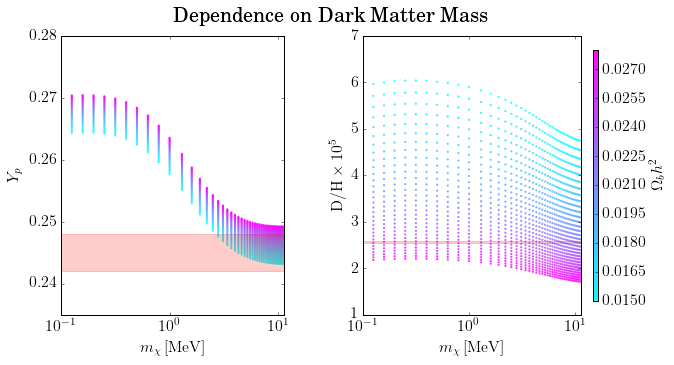

In [2]:
scenario = 'Nu_Zp'
filename = scenario + '.txt'
data = get_data(filename)
print('Loaded data from: {}\nLength: {}'.format(filename, len(data['mass'])))

plot_distributions(data, scenario)
plot_abundances(data, scenario)

Shown in red are the 1$\sigma$ error bounds around the central value. Now we compute the $\chi^2$ using the definition given above,

\begin{align}
\chi_{\rm BBN}^2 = \frac{\left[Y_{\rm P} - Y_{\rm P}^{\rm Exp}\right]^2}{\sigma_{Y_{\rm P}}^2|{}^{\rm Theo} + \sigma_{Y_{\rm P}}^2|{}^{\rm Exp}} + \frac{\left[{\rm D/H}|_{\rm P} - {\rm D/H}|_{\rm P}^{\rm Exp}\right]^2}{\sigma_{{\rm D/H}|_{\rm P}}^2|{}^{\rm Theo} + \sigma_{{\rm D/H}|_{\rm P}}^2|{}^{\rm Exp}}
\end{align}

Furthermore, we take the $1 \sigma$, $2 \sigma$, etc. critical values to be,

| Confidence Level | Critical Value ($\nu = 1$) | Critical Value ($\nu = 2$)|
| --- | --- | --- |
| 1$\sigma$ |  1.00 |  2.30 |
| 2$\sigma$ |  4.00 |  6.18 |
| 3$\sigma$ |  9.00 | 11.83 |
| 4$\sigma$ | 16.00 | 19.33 |
| 5$\sigma$ | 25.00 | 28.74 |

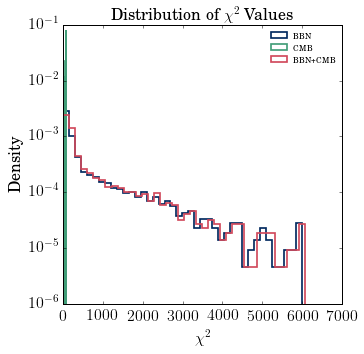

In [3]:
plot_chisq_distribution(data, scenario)

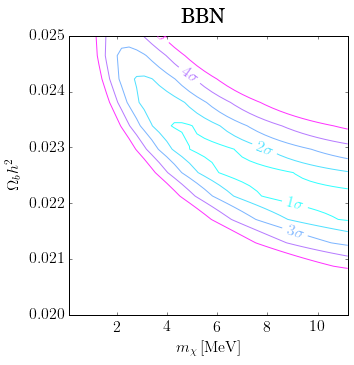

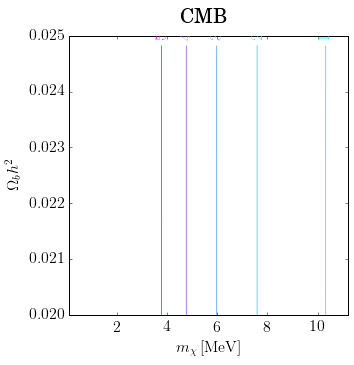

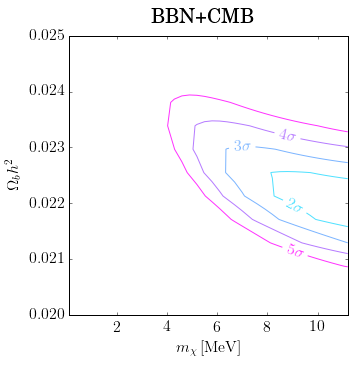

In [4]:
plot_mchi_omegab_contours(data, scenario, 'BBN')
plot_mchi_omegab_contours(data, scenario, 'CMB')
plot_mchi_omegab_contours(data, scenario, 'BBN+CMB')

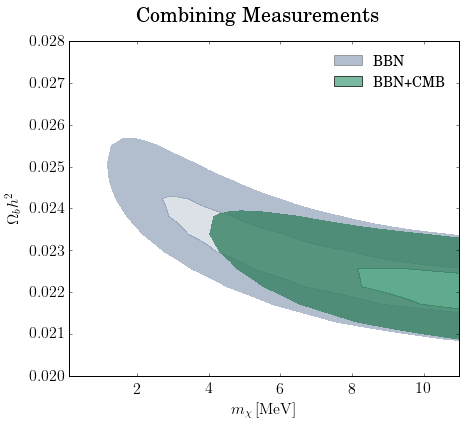

In [5]:
plot_joint_mchi_omegab(data, scenario)

<center><h3>Marginalising over $\Omega_b h^2$</h3></center>

The next step is to marginalise over the baryon density. This is achieved as follows: we define the marginalised $\chi^2$ as a function of the dark matter mass,

$$\tilde{\chi}^2(m_\chi) := \min_{\Omega_b h^2}{\chi^2(m_\chi, \Omega_b h^2)}$$

To work directly with confidence levels, we then subtract the minimum value over all masses,

$$\Delta \tilde{\chi}^2_{\mathrm{BBN}} := \tilde{\chi}^2(m_\chi) - \min_{m_\chi}{\tilde{\chi}^2(m_\chi)}$$

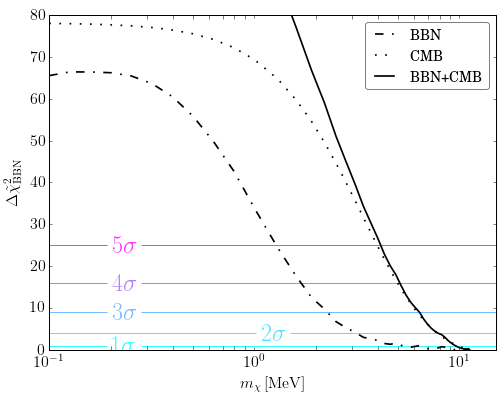

In [6]:
plot_deltachisq(data, scenario, zoom=False)

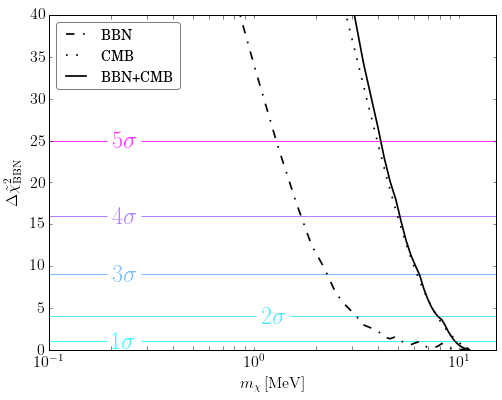

In [7]:
plot_deltachisq(data, scenario, zoom=True)

We collect the results to find the lowest $m_\chi$ for each confidence level so as to set the desired bounds.

In [8]:
save_results(data, scenario)

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
